# 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

In [2]:
df = pd.read_csv('c:/data/bank/Base.csv')
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


# 전처리

## 데이터 확인

In [3]:
df.shape

(1000000, 32)

In [4]:
df[df['fraud_bool']==1]

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873756,1,0.9,0.748805,-1,36,50,0.001004,-0.360484,AB,804,...,0,200.0,0,INTERNET,7.572736,windows,0,1,0,4
873757,1,0.9,0.135050,-1,81,60,0.005337,-1.150811,AC,1247,...,0,200.0,0,INTERNET,5.080246,windows,0,1,0,4
873758,1,0.5,0.148947,-1,368,60,0.008178,-0.995282,AB,874,...,0,1500.0,0,INTERNET,1.768153,windows,1,1,0,4
873759,1,0.8,0.504183,-1,72,20,0.007644,-0.424105,AD,1770,...,0,500.0,0,INTERNET,9.579747,windows,0,1,0,4


In [5]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [6]:
for column in df.columns:
    print(column, df[column].unique(), '\n')

fraud_bool [1 0] 

income [0.9 0.3 0.7 0.6 0.4 0.2 0.8 0.1 0.5] 

name_email_similarity [0.16682773 0.29628601 0.04498549 ... 0.87940313 0.76211215 0.69745243] 

prev_address_months_count [ -1  92 172  28 289  35  55 194 103  27  34  58  61  12  57  53  96  30
 111  26  86  64  18 234  97  56  54 125 110  65 217  93 126  25  33  80
  99  45 104  87  49  62 282 101 135 154  36  14  91  83  10  32  51 325
 333 159  11 318 109 152 288 102 336 202 225 118 115 319 201  47  37 241
  60  13 165  66  94  95  98  59  29  89  16 304 211 314  22  31  63 321
 141 112  52 151 142   9  50 173  90 307 106  78  24 195 310   8 146 284
  85  44 160  23 100  38  48 327 140 105 122  67 127  21 119   7 156 179
  88 107  82  42 145 324  39 306 339 209 294  72  79 246 114  84 137  46
 188 220 139  74 312 239  75  20 161 168 290  68 187 303 116 230 297  77
 203 181 177  41 291 123 124 108 295 308 133 183 278  43 121 130 328 113
 189 300 222 199  70 196 216 355  15  81 315 117 131 298 157  76  40 213
 338 237 

In [7]:
df.dtypes

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

array([[<AxesSubplot:title={'center':'fraud_bool'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'name_email_similarity'}>,
        <AxesSubplot:title={'center':'prev_address_months_count'}>,
        <AxesSubplot:title={'center':'current_address_months_count'}>],
       [<AxesSubplot:title={'center':'customer_age'}>,
        <AxesSubplot:title={'center':'days_since_request'}>,
        <AxesSubplot:title={'center':'intended_balcon_amount'}>,
        <AxesSubplot:title={'center':'zip_count_4w'}>,
        <AxesSubplot:title={'center':'velocity_6h'}>],
       [<AxesSubplot:title={'center':'velocity_24h'}>,
        <AxesSubplot:title={'center':'velocity_4w'}>,
        <AxesSubplot:title={'center':'bank_branch_count_8w'}>,
        <AxesSubplot:title={'center':'date_of_birth_distinct_emails_4w'}>,
        <AxesSubplot:title={'center':'credit_risk_score'}>],
       [<AxesSubplot:title={'center':'email_is_free'}>,
        <AxesSubplot:title={'center':'p

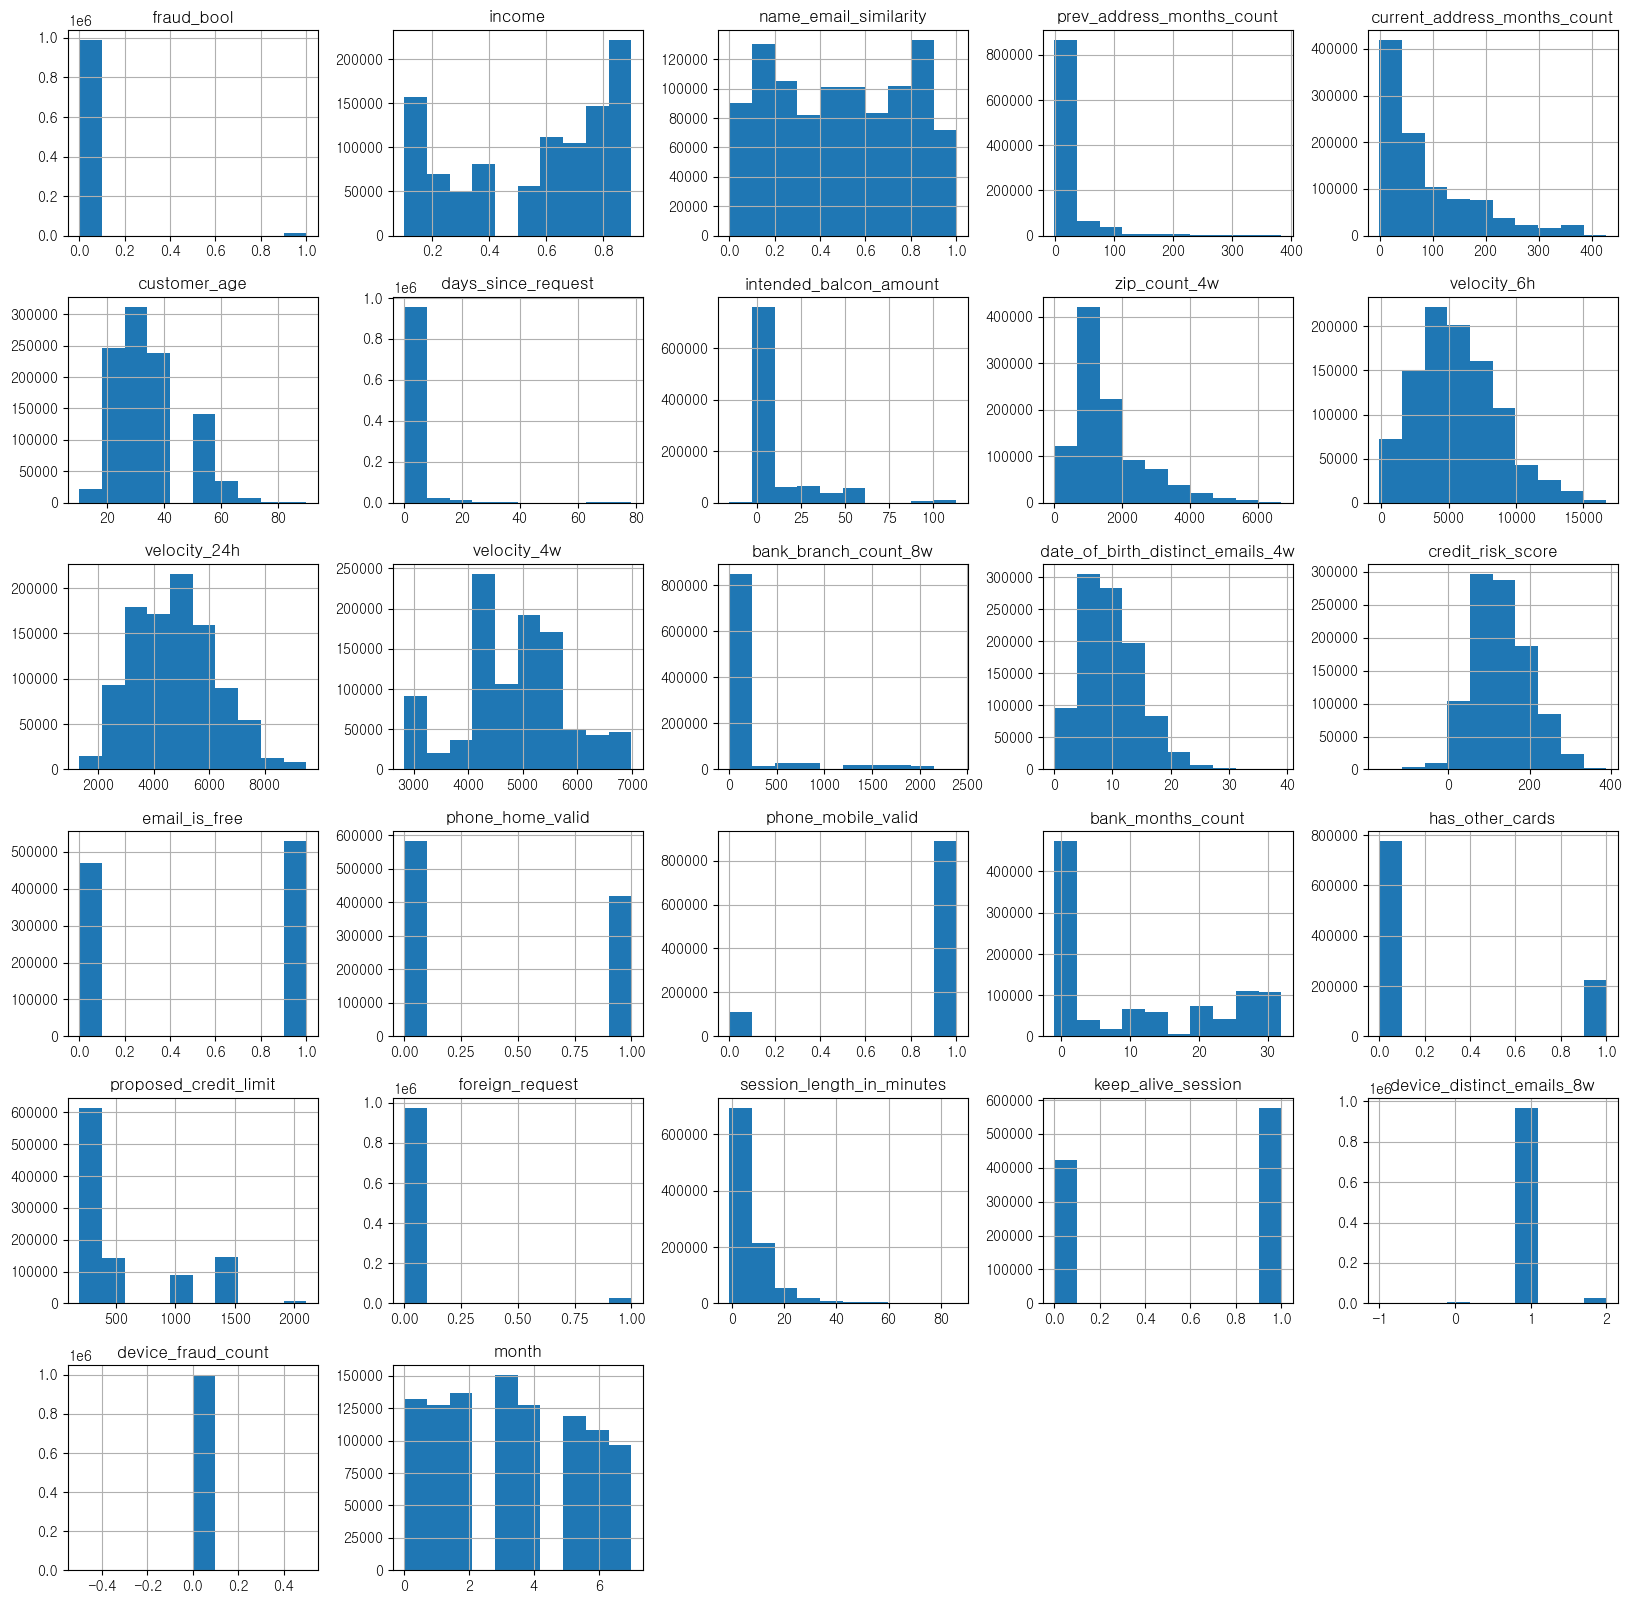

In [8]:
df.hist(figsize=(20,20))

## 전처리

In [27]:
# 불필요한 컬럼 제거
df.drop(['prev_address_months_count', 'device_fraud_count'], axis=1, inplace=True)

### 결측치

In [28]:
for i in df.index:
    if(df.loc[i, 'current_address_months_count']==-1):
        df.loc[i, 'current_address_months_count'] = None
    if(df.loc[i, 'bank_months_count']==-1):
        df.loc[i, 'bank_months_count'] = None
    if(df.loc[i, 'session_length_in_minutes']==-1):
        df.loc[i, 'session_length_in_minutes'] = None
    if(df.loc[i, 'device_distinct_emails_8w']==-1):
        df.loc[i, 'device_distinct_emails_8w'] = None
    

In [29]:
df.isnull().sum()

fraud_bool                               0
income                                   0
name_email_similarity                    0
current_address_months_count          4254
customer_age                             0
days_since_request                       0
intended_balcon_amount                   0
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                        0
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   253635
has_other_cards                          0
proposed_credit_limit                    0
foreign_req

In [30]:
df1 = df.dropna()
df1['fraud_bool'].value_counts()

0    735491
1      6871
Name: fraud_bool, dtype: int64

array([[<AxesSubplot:title={'center':'fraud_bool'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'name_email_similarity'}>,
        <AxesSubplot:title={'center':'current_address_months_count'}>,
        <AxesSubplot:title={'center':'customer_age'}>],
       [<AxesSubplot:title={'center':'days_since_request'}>,
        <AxesSubplot:title={'center':'intended_balcon_amount'}>,
        <AxesSubplot:title={'center':'zip_count_4w'}>,
        <AxesSubplot:title={'center':'velocity_6h'}>,
        <AxesSubplot:title={'center':'velocity_24h'}>],
       [<AxesSubplot:title={'center':'velocity_4w'}>,
        <AxesSubplot:title={'center':'bank_branch_count_8w'}>,
        <AxesSubplot:title={'center':'date_of_birth_distinct_emails_4w'}>,
        <AxesSubplot:title={'center':'credit_risk_score'}>,
        <AxesSubplot:title={'center':'email_is_free'}>],
       [<AxesSubplot:title={'center':'phone_home_valid'}>,
        <AxesSubplot:title={'center':'phone_mobi

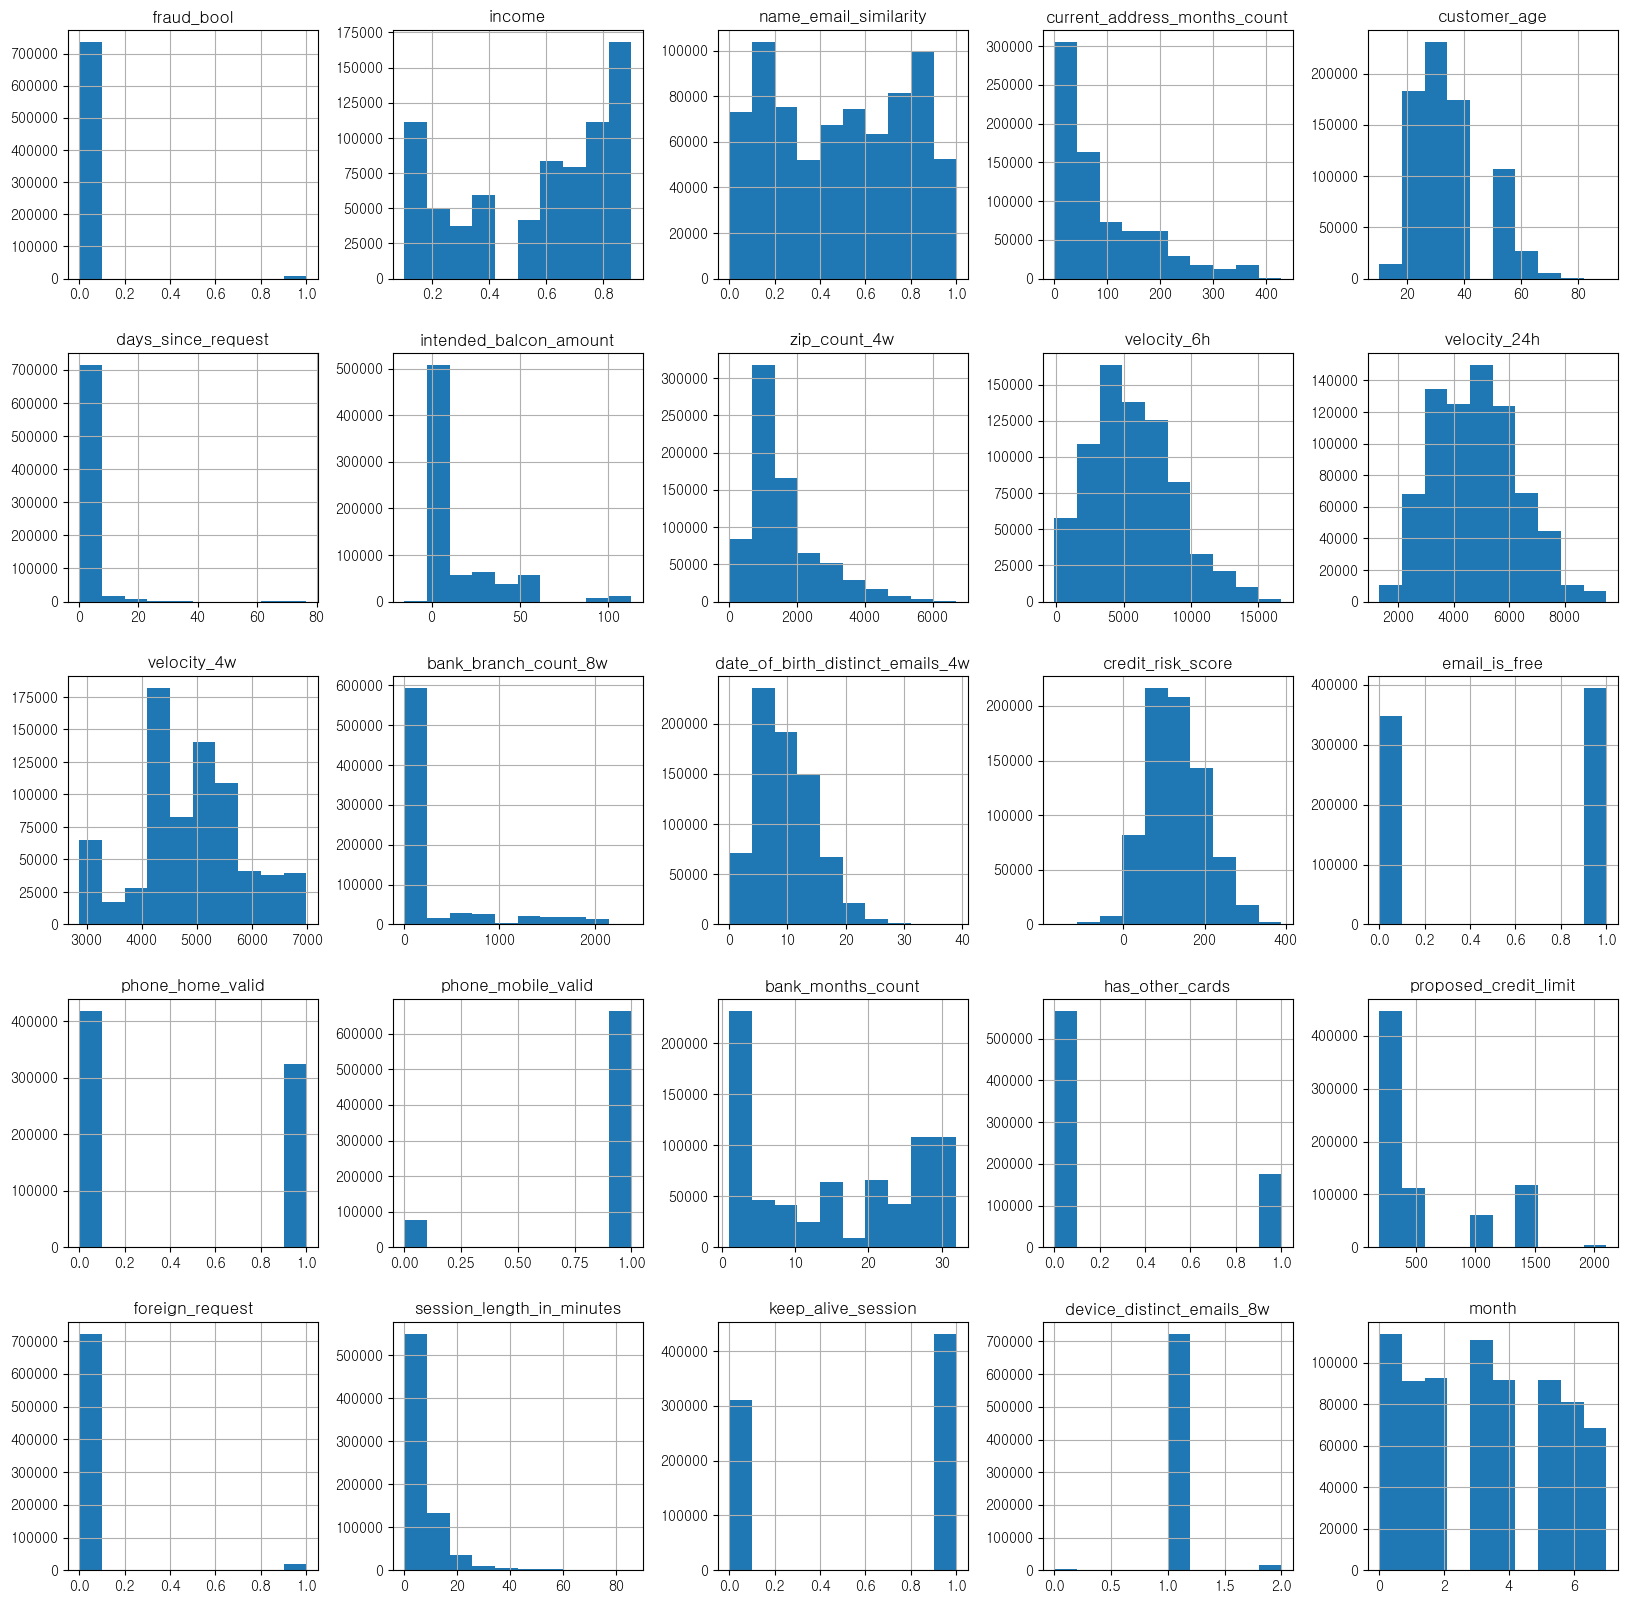

In [31]:
df1.hist(figsize=(20,20))

### 원핫엔코딩

In [ ]:
"""
원핫엔코딩:
payment_type
employment_status
housing_status
source
device_os

email_is_free
phone_home_valid
phone_mobile_valid
has_other_cards
foreign_request
keep_alive_session
"""